In [2]:
#Librarite e perdorura
import numpy as np 
import pandas as pd 
import os
import matplotlib.pyplot as plt
import re
import seaborn as sns
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer
from nltk.tokenize.treebank import TreebankWordDetokenizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.ensemble import RandomForestClassifier 
from sklearn import svm
from sklearn.metrics import accuracy_score ,classification_report
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn import metrics
from sklearn.metrics import roc_curve, auc
from sklearn.utils import shuffle
from sklearn.model_selection import GridSearchCV
!pip install imbalanced-learn
import imblearn
from imblearn.over_sampling import SMOTE 
#conda install -c conda-forge wordcloud
from wordcloud import WordCloud 



In [3]:
NonDepressiveDset = pd.read_csv('NonDepressiveTw.csv')

NonDepressiveDset.head(10)
#dataseti jo depresiv

,id,date,user,text
0,1467822272,Mon Apr 06 22:22:45 PDT 2009,ersle,I LOVE @Health4UandPets u guys r the best!!
1,1467822273,Mon Apr 06 22:22:45 PDT 2009,becca210,im meeting up with one of my besties tonight! ...
2,1467822283,Mon Apr 06 22:22:46 PDT 2009,Wingman29,"@DaRealSunisaKim Thanks for the Twitter add, S..."
3,1467822391,Mon Apr 06 22:22:47 PDT 2009,ajarofalmonds,@ProductOfFear You can tell him that I just bu...
4,1467822489,Mon Apr 06 22:22:49 PDT 2009,emmasaur28,"@tommcfly ah, congrats mr fletcher for finally..."
5,1467822530,Mon Apr 06 22:22:49 PDT 2009,claaare,crazy day of school. there for 10 hours straii...
6,1467822531,Mon Apr 06 22:22:49 PDT 2009,Hollywood_Trey,@naughtyhaughty HOW DID I FORGET ABOUT TWO AND...
7,1467822814,Mon Apr 06 22:22:54 PDT 2009,misstoriblack,Just added tweetie to my new iPhone
8,1467822924,Mon Apr 06 22:22:55 PDT 2009,ddjuli,@nicolerichie: your picture is very sweet
9,1467822964,Mon Apr 06 22:22:56 PDT 2009,lightleaves,"Dancing around the room in Pjs, jamming to my ..."


In [4]:
NonDepressiveDset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      1000 non-null   int64 
 1   date    1000 non-null   object
 2   user    1000 non-null   object
 3   text    1000 non-null   object
dtypes: int64(1), object(3)
memory usage: 31.4+ KB


In [5]:
NonDepressiveDset["target"] = 'Not Depressive'

NonDepressiveDset = NonDepressiveDset[['target', 'text']]

NonDepressiveDset.head(10)

,target,text
0,Not Depressive,I LOVE @Health4UandPets u guys r the best!!
1,Not Depressive,im meeting up with one of my besties tonight! ...
2,Not Depressive,"@DaRealSunisaKim Thanks for the Twitter add, S..."
3,Not Depressive,@ProductOfFear You can tell him that I just bu...
4,Not Depressive,"@tommcfly ah, congrats mr fletcher for finally..."
5,Not Depressive,crazy day of school. there for 10 hours straii...
6,Not Depressive,@naughtyhaughty HOW DID I FORGET ABOUT TWO AND...
7,Not Depressive,Just added tweetie to my new iPhone
8,Not Depressive,@nicolerichie: your picture is very sweet
9,Not Depressive,"Dancing around the room in Pjs, jamming to my ..."


In [6]:
DepressiveDset = pd.read_csv('DepressiveTw.csv', sep = '|', header = None, usecols = [0, 1, 2, 3,4 ,5 ], names=[ 'id', 'Date', 'Time', 'Timezone', 'user', 'text'])

DepressiveDset.head(10)
#dataseti depresiv

,id,Date,Time,Timezone,user,text
0,989292962323615744,2018-04-25,23:59:57,Eastern Standard Time,whosalli,The lack of this understanding is a small but ...
1,989292959844663296,2018-04-25,23:59:56,Eastern Standard Time,estermnunes,i just told my parents about my depression and...
2,989292951716155392,2018-04-25,23:59:54,Eastern Standard Time,TheAlphaAries,depression is something i don't speak about ev...
3,989292873664393218,2018-04-25,23:59:35,Eastern Standard Time,_ojhodgson,Made myself a tortilla filled with pb&j. My de...
4,989292856119472128,2018-04-25,23:59:31,Eastern Standard Time,DMiller96371630,@WorldofOutlaws I am gonna need depression med...
5,989292843125616641,2018-04-25,23:59:28,Eastern Standard Time,PHOTOGPRODIG,my anxiety and my depression fighting over who...
6,989291000911642625,2018-04-25,23:52:09,Eastern Standard Time,sp4cecounty,wow she's suddenly cured my depression and gav...
7,989290997346643968,2018-04-25,23:52:08,Eastern Standard Time,sassi_klassi,"I am officially done with @kanyewest. him, the..."
8,989290972973600770,2018-04-25,23:52:02,Eastern Standard Time,therealazukaobi,Me: what's wrong?My girl: *looks up at me with...
9,989290951012044800,2018-04-25,23:51:57,Eastern Standard Time,KateSusabu,@AusBorderForce @PeterDutton_MP @shanebazzi Ag...


In [7]:
DepressiveDset["target"] = 'Depressive'

DepressiveDset = DepressiveDset[['target' ,'text' ]]

DepressiveDset.dropna(inplace=True)

DepressiveDset = DepressiveDset.copy().sample(2300, random_state=40)

DepressiveDset.head(10)

,target,text
2280,Depressive,@GreninjaGirl666 Mine is both.(Goes into depre...
960,Depressive,"Save the date, May 8th 11:30 am PDT. We are i..."
1404,Depressive,Exercise lowers risk of depression at all ages...
1060,Depressive,Tbt this song that helped me to deal with my d...
659,Depressive,From Medium: Atlanta and the Unfolding of Pape...
216,Depressive,"Me acne has been cured, my depression is gone,..."
2118,Depressive,I like how they incorporated manic depression ...
2310,Depressive,Depression's such a villainous state
1384,Depressive,depression: Gone https://twitter.com/stray_ki...
2024,Depressive,Depression trashed all my relationships in col...


In [8]:
Dset = NonDepressiveDset.append(DepressiveDset)

Dset = shuffle(Dset)

Dset = Dset.drop_duplicates(subset='text', keep='first')

Dset.head(10)
#dataseti i kombinuar

,target,text
1997,Depressive,H8 when people self diagnose or make jokes abo...
31,Not Depressive,@little__fish guess where i live. the other si...
137,Not Depressive,"@SashaKane Um, my kids get up at 5am &amp; nee..."
437,Not Depressive,hanging out with Emily. I love her. She's wond...
1127,Depressive,"A million memes a day,keep depression away."
1072,Depressive,6 Things to Know About Childhood Depression – ...
554,Depressive,depression is a killer of faith.#IN_HIS_PRESEN...
14,Not Depressive,@ALBinLA. I was just thinking about you tonig...
654,Not Depressive,@bloodandmilk Neat! Red Cross &amp; Red Cresc...
68,Not Depressive,@JonathanRKnight : agreed. internet? random. b...


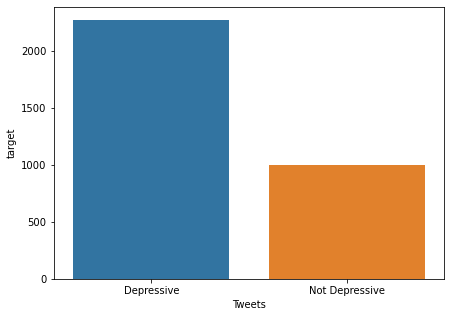

In [9]:
fig = plt.figure(figsize=(7,5))

ax = sns.barplot(x=Dset["target"].unique(),y=Dset["target"].value_counts());

ax.set(xlabel='Tweets'); 

# Preprocessing

In [10]:
targetSub = {'Not Depressive': 0,'Depressive': 1} 

Dset['target'] = [targetSub[item] for item in Dset['target']] 



In [11]:
cont = pd.read_json('EngCont.json', typ='series')

cont = cont.to_dict()

regCont = re.compile('(%s)' % '|'.join(cont.keys()))

#Zgjerimi i fjaleve te shkurtra
def expandCont(tweet, regCont=regCont):    
    def replaceCont(wordMatch):
        return cont[wordMatch.group(0)]
    return regCont.sub(replaceCont, tweet)

Dset['text'] = Dset['text'].apply(expandCont)

In [12]:
def preprocess(sentence):
    
        sentence = str(sentence)
        
        sentence = sentence.lower() #ZVOGLIMI I SHKRONJAVE
        
        sentence = re.sub('https?:/\/\S+', ' ', sentence) # LARGIMI I URL-ve
        
        sentence = re.sub('<([^>]*)>', ' ', sentence) # LARGIMI I EMOJI-ve
        
        sentence = re.sub('@\w+', ' ', sentence) # LARGIMI I MENTIONS
        
        sentence = re.sub('#', ' ', sentence) # LARGIMI I HASHTAG
        
        sentence = re.sub('[0-9]+', ' ', sentence) # LARGIMI I NUMRA-ve
        
        sentence = sentence.strip() # FSHIRJA E SPACE-ve TE PARE DHE TE FUNDIT     
        
        sentence = re.sub('[^A-Za-z0-9]+', ' ', sentence) # LARGIMI I SIMBOLEVE TJERA
                
        return sentence
    
Dset['text'] = Dset['text'].apply(preprocess)

In [13]:
nltk.download('stopwords')

stopWords = stopwords.words('english') #stopwords ne gjuhen angleze 

regStop = r'\b(?:{})\b'.format('|'.join(stopWords))   #gjetja e tyre

Dset['text']= Dset['text'].str.replace(regStop, '')   #Largimi i tyre

Dset['text'] = Dset['text'].str.replace(r'\s+', ' ')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Asus\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [14]:
nltk.download('punkt') # Shkarkimi 

Dset['text'] = Dset['text'].apply(word_tokenize) #Aplikimi i tokenizimit në nivel të fjalës

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Asus\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [15]:
Pstemmer = PorterStemmer() #perdorimi i stemming 

Dset['text'] = Dset['text'].apply(lambda x: [Pstemmer.stem(i) for i in x]) #Aplikimi për çdo fjalë brenda rreshtave

Dset['text'] = Dset['text'].apply(lambda x: ' '.join([w for w in x])) #Ngjitja e token-ve

Dset.head(20)
#dataseti i perprunuar

,target,text
1997,1,h peopl self diagnos make joke depress addict ...
31,0,guess live side earth east mesa losiento
137,0,um kid get amp need breakfast cook readi
437,0,hang emili love wonder
1127,1,million meme day keep depress away
1072,1,thing know childhood depress u news world report
554,1,depress killer faith presenc music experi load...
14,0,think tonight let first interview famou super ...
654,0,neat red cross amp red crescent red lion sun o...
68,0,agre internet random like random watch dirti d...


# Data Analize

In [207]:
common_NotDep = pd.Series(' '.join(Dset['text'][Dset['target'] == 0]).lower().split()).value_counts()[:15] 
print(common_NotDep) #Fjalet me te shpeshta tek tweets jo depresiv

good       121
love       119
day         75
thank       74
go          73
quot        59
get         55
like        54
time        51
new         49
twitter     48
night       47
one         46
know        46
watch       41
dtype: int64


<AxesSubplot:>

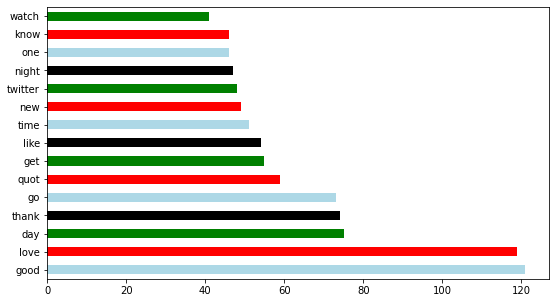

In [208]:
common_NotDep.plot(kind='barh',figsize=(9,5), color=['lightblue','red','green','black'])


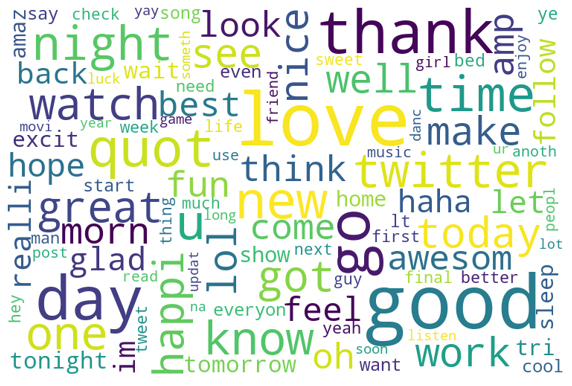

In [209]:
notDepressive_words = ' '.join([text for text in Dset['text'][Dset['target'] == 0]])

wordcloud = WordCloud(width=750, height=500,max_words=100, random_state=21, max_font_size=100,collocations=False, background_color="white").generate(notDepressive_words) 

plt.figure(figsize=(10, 7)) 
plt.imshow(wordcloud, interpolation="catrom") 
plt.axis('off') 
plt.show()

In [210]:
common_Dep = pd.Series(' '.join(Dset['text'][Dset['target'] == 1]).lower().split()).value_counts()[:15]
print(common_Dep)          #Fjalet me te shpeshta tek tweets depresiv

depress    2404
anxieti     387
twitter     302
com         283
pic         282
like        220
get         173
go          170
peopl       167
feel        160
know        152
help        152
one         133
life        129
mental      119
dtype: int64


<AxesSubplot:>

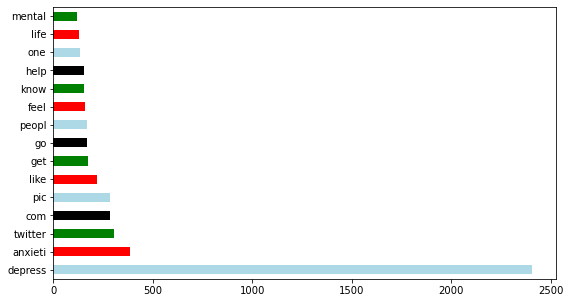

In [211]:
common_Dep.plot(kind='barh',figsize=(9,5), color=['lightblue','red','green','black'])


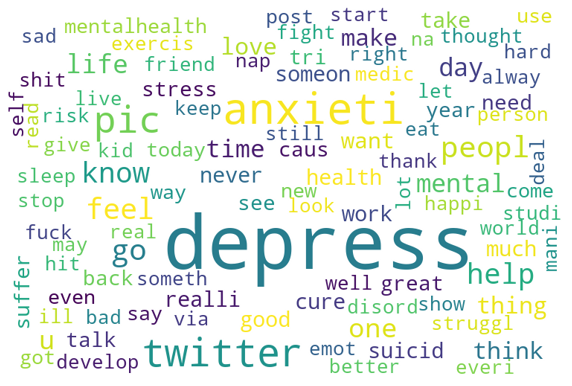

In [212]:
depressive_words = ' '.join([text for text in Dset['text'][Dset['target'] == 1]])

wordcloud = WordCloud(width=750, height=500,max_words=100, random_state=21, max_font_size=100,collocations=False, background_color="white").generate(depressive_words) 

plt.figure(figsize=(10, 7)) 
plt.imshow(wordcloud, interpolation="catrom") 
plt.axis('off') 
plt.show()

# Training

In [17]:
count_vectorizer = CountVectorizer(stop_words='english') 

cvDset = count_vectorizer.fit_transform(Dset['text'])

tfidfconv = TfidfTransformer()  #TF-IDF

tfidfDset = tfidfconv.fit_transform(cvDset)

In [20]:
X_train,X_test,y_train,y_test = train_test_split(tfidfDset , Dset['target'].values , test_size=.2, random_state=42)

print("Forma e X_train dataset: ", X_train.shape) 
print("Forma e y_train dataset: ", y_train.shape,"\n") 

print("Forma e X_test dataset: ", X_test.shape) 
print("Forma e y_test dataset: ", y_test.shape) 


Forma e X_train dataset:  (2618, 6512)
Forma e y_train dataset:  (2618,) 

Forma e X_test dataset:  (655, 6512)
Forma e y_test dataset:  (655,)


In [22]:
smote = SMOTE() #algoritmi per balancimin e te dhenave trajnuese

X_train_smote, y_train_smote = smote.fit_sample(X_train, y_train)

print("Para SMOTE, numri i etiketave '1' apo 'Depressive': {}".format(sum(y_train == 1))) 
print("Para SMOTE, numri i etiketave '0' apo 'Not Depressive': {}\n".format(sum(y_train == 0)))   
print("Pas SMOTE, numri i etiketave '1' apo 'Depressive': {}".format(sum(y_train_smote == 1))) 
print("Pas SMOTE, numri i etiketave '0' apo 'Not Depressive': {}".format(sum(y_train_smote == 0))) 



Para SMOTE, numri i etiketave '1' apo 'Depressive': 1801
Para SMOTE, numri i etiketave '0' apo 'Not Depressive': 817

Pas SMOTE, numri i etiketave '1' apo 'Depressive': 1801
Pas SMOTE, numri i etiketave '0' apo 'Not Depressive': 1801


## Random Forest

In [227]:
rf = RandomForestClassifier()

rf.fit(X_train_smote,y_train_smote)

predictRF = rf.predict(X_test)

print("Accuraccy of Random Forest: ",accuracy_score(predictRF,y_test)*100,"%")

print(classification_report(y_test, predictRF, digits=4))

Accuraccy of Random Forest:  97.40458015267176 %
              precision    recall  f1-score   support

           0     0.9908    0.9348    0.9620       230
           1     0.9658    0.9953    0.9803       425

    accuracy                         0.9740       655
   macro avg     0.9783    0.9650    0.9711       655
weighted avg     0.9745    0.9740    0.9739       655



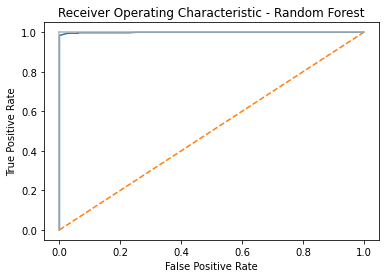

In [217]:
    y_score = rf.predict_proba(X_test)[:,1]
    false_positive_rate, true_positive_rate, threshold = roc_curve(y_test, y_score)
    
    plt.subplots(1, figsize=(6,4))
    plt.title('Receiver Operating Characteristic - Random Forest')
    plt.plot(false_positive_rate, true_positive_rate)
    plt.plot([0, 1], ls="--")
    plt.plot([0, 0], [1, 0] , c=".7"), plt.plot([1, 1] , c=".7")
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    plt.show()
    

In [235]:
#n estimators
n_estimators = [1, 10, 50, 100]
for estimator in n_estimators:
    rfc = RandomForestClassifier(n_estimators=estimator)
    rfc.fit(X_train_smote, y_train_smote)
    y_pred = rfc.predict(X_test)
    print("----------------------------------------------------------------------")
    print("Classification report of Random Forest with ",estimator, " estimators. ")
    print(classification_report(y_test, y_pred, digits=4))

----------------------------------------------------------------------
Classification report of Random Forest with  1  estimators. 
              precision    recall  f1-score   support

           0     0.8062    0.9043    0.8525       230
           1     0.9446    0.8824    0.9124       425

    accuracy                         0.8901       655
   macro avg     0.8754    0.8934    0.8824       655
weighted avg     0.8960    0.8901    0.8914       655

----------------------------------------------------------------------
Classification report of Random Forest with  10  estimators. 
              precision    recall  f1-score   support

           0     0.9327    0.9043    0.9183       230
           1     0.9491    0.9647    0.9568       425

    accuracy                         0.9435       655
   macro avg     0.9409    0.9345    0.9376       655
weighted avg     0.9433    0.9435    0.9433       655

----------------------------------------------------------------------
Classifica

In [219]:
#max depth apo gjersia maksimale e pemes
max_depths = [ 1, 10, 100, 500]
for max_depth in max_depths:
    rfc = RandomForestClassifier(max_depth=max_depth, n_jobs=-1)
    rfc.fit(X_train_smote, y_train_smote)
    y_pred = rfc.predict(X_test)
    print("-------------------------------------------------------------")
    print("Accuraccy of Random Forest with depth",int(max_depth)," : ",accuracy_score(y_pred,y_test)*100,"%")
    print(classification_report(y_test, y_pred, digits=4))

-------------------------------------------------------------
Accuraccy of Random Forest with depth 1  :  97.09923664122138 %
              precision    recall  f1-score   support

           0     0.9342    0.9870    0.9598       230
           1     0.9927    0.9624    0.9773       425

    accuracy                         0.9710       655
   macro avg     0.9634    0.9747    0.9686       655
weighted avg     0.9722    0.9710    0.9712       655

-------------------------------------------------------------
Accuraccy of Random Forest with depth 10  :  97.09923664122138 %
              precision    recall  f1-score   support

           0     0.9237    1.0000    0.9603       230
           1     1.0000    0.9553    0.9771       425

    accuracy                         0.9710       655
   macro avg     0.9618    0.9776    0.9687       655
weighted avg     0.9732    0.9710    0.9712       655

-------------------------------------------------------------
Accuraccy of Random Forest with

In [220]:
#min_samples_leaf
min_samples_leafs = [1, 10, 50, 100]
for min_samples_leaf in min_samples_leafs:
    rf = RandomForestClassifier(min_samples_leaf=min_samples_leaf)
    rf.fit(X_train_smote, y_train_smote)
    y_pred = rf.predict(X_test)
    print("-------------------------------------------------------------")
    print("Accuraccy of Random Forest with ",min_samples_leaf," : ",accuracy_score(y_pred,y_test)*100,"%")
    print(classification_report(y_test, y_pred, digits=4))

-------------------------------------------------------------
Accuraccy of Random Forest with  1  :  97.25190839694656 %
              precision    recall  f1-score   support

           0     0.9862    0.9348    0.9598       230
           1     0.9657    0.9929    0.9791       425

    accuracy                         0.9725       655
   macro avg     0.9760    0.9639    0.9695       655
weighted avg     0.9729    0.9725    0.9723       655

-------------------------------------------------------------
Accuraccy of Random Forest with  10  :  98.93129770992365 %
              precision    recall  f1-score   support

           0     0.9705    1.0000    0.9850       230
           1     1.0000    0.9835    0.9917       425

    accuracy                         0.9893       655
   macro avg     0.9852    0.9918    0.9884       655
weighted avg     0.9896    0.9893    0.9893       655

-------------------------------------------------------------
Accuraccy of Random Forest with  50  :  7

In [236]:
n_estimators = [1, 10, 50, 100, 200]
max_depth =[ 1, 10, 100, 500]
min_samples_leaf = [ 1, 10, 50, 100] 

parameters = dict(n_estimators = n_estimators, max_depth = max_depth, min_samples_leaf = min_samples_leaf)

gridF = GridSearchCV(rf, parameters, cv = 3, verbose = 1,n_jobs = -1)
bestF = gridF.fit(X_train_smote, y_train_smote)
print("Accuracy: ",bestF.best_score_*100," %")
print(bestF.best_estimator_)
#Random forest me akordim te parametrave automatikisht

Fitting 3 folds for each of 80 candidates, totalling 240 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    2.5s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:    8.2s
[Parallel(n_jobs=-1)]: Done 240 out of 240 | elapsed:   11.9s finished


Accuracy:  99.6482683982684  %
RandomForestClassifier(max_depth=100)


## Support Vector Classifier

In [228]:
svc = svm.SVC()

svc.fit(X_train_smote,y_train_smote)

predictSVC = svc.predict(X_test)

print("Accuraccy of Support Vector Classifier: ",accuracy_score(predictSVC,y_test)*100,"%")

print(classification_report(y_test, predictSVC, digits=5))

Accuraccy of Support Vector Classifier:  97.86259541984734 %
              precision    recall  f1-score   support

           0    0.97788   0.96087   0.96930       230
           1    0.97902   0.98824   0.98361       425

    accuracy                        0.97863       655
   macro avg    0.97845   0.97455   0.97645       655
weighted avg    0.97862   0.97863   0.97858       655



In [229]:
kernels = ['linear', 'rbf', 'poly']
for kernel in kernels:
    svc = svm.SVC(kernel=kernel).fit(X_train_smote,y_train_smote)
    predictSVC = svc.predict(X_test)
    print("-------------------------------------------------------------")
    print("Classification report of Support Vector Classifier with ",kernel.upper()," kernel.")
    print(classification_report(y_test, predictSVC, digits=4))
    print("\n")

-------------------------------------------------------------
Classification report of Support Vector Classifier with  LINEAR  kernel.
              precision    recall  f1-score   support

           0     0.9745    0.9957    0.9849       230
           1     0.9976    0.9859    0.9917       425

    accuracy                         0.9893       655
   macro avg     0.9860    0.9908    0.9883       655
weighted avg     0.9895    0.9893    0.9893       655



-------------------------------------------------------------
Classification report of Support Vector Classifier with  RBF  kernel.
              precision    recall  f1-score   support

           0     0.9779    0.9609    0.9693       230
           1     0.9790    0.9882    0.9836       425

    accuracy                         0.9786       655
   macro avg     0.9784    0.9746    0.9765       655
weighted avg     0.9786    0.9786    0.9786       655



-------------------------------------------------------------
Classificatio

In [230]:
gammas = [0.1, 1, 10]
for gamma in gammas:
    svc = svm.SVC(kernel='rbf', gamma=gamma).fit(X_train_smote,y_train_smote)
    predictSVC = svc.predict(X_test)
    print("-------------------------------------------------------------")
    print("Classification report  of Support Vector Classifier with gamma = ",gamma)
    print(classification_report(y_test, predictSVC, digits=4))
    print("\n")

-------------------------------------------------------------
Classification report  of Support Vector Classifier with gamma =  0.1
              precision    recall  f1-score   support

           0     0.9502    0.9957    0.9724       230
           1     0.9976    0.9718    0.9845       425

    accuracy                         0.9802       655
   macro avg     0.9739    0.9837    0.9785       655
weighted avg     0.9809    0.9802    0.9803       655



-------------------------------------------------------------
Classification report  of Support Vector Classifier with gamma =  1
              precision    recall  f1-score   support

           0     0.9780    0.9652    0.9716       230
           1     0.9813    0.9882    0.9848       425

    accuracy                         0.9802       655
   macro avg     0.9796    0.9767    0.9782       655
weighted avg     0.9801    0.9802    0.9801       655



-------------------------------------------------------------
Classification rep

In [231]:
cs = [0.1, 1, 10]
for c in cs:
    svc = svm.SVC(kernel='rbf', C=c).fit(X_train_smote,y_train_smote)
    predictSVC = svc.predict(X_test)
    print("-------------------------------------------------------------")
    print("Classification report of Support Vector Classifier with c = ",c)
    print(classification_report(y_test, predictSVC, digits=4))
    print("\n")

-------------------------------------------------------------
Classification report of Support Vector Classifier with c =  0.1
              precision    recall  f1-score   support

           0     0.9737    0.1609    0.2761       230
           1     0.6872    0.9976    0.8138       425

    accuracy                         0.7038       655
   macro avg     0.8304    0.5793    0.5450       655
weighted avg     0.7878    0.7038    0.6250       655



-------------------------------------------------------------
Classification report of Support Vector Classifier with c =  1
              precision    recall  f1-score   support

           0     0.9779    0.9609    0.9693       230
           1     0.9790    0.9882    0.9836       425

    accuracy                         0.9786       655
   macro avg     0.9784    0.9746    0.9765       655
weighted avg     0.9786    0.9786    0.9786       655



-------------------------------------------------------------
Classification report of Sup

In [232]:
C = [0.1, 1, 10]
gamma=[0.1, 1, 10]
kernel=['rbf','linear','poly']

hyperp={'kernel':kernel,'C':C,'gamma':gamma}

gd = GridSearchCV( estimator=svm.SVC(), param_grid=hyperp, n_jobs=-1, verbose=True)
gd.fit(X_train_smote,y_train_smote)
print(gd.best_score_)
print(gd.best_estimator_)
#SVM me akordim parametrave automatik

Fitting 5 folds for each of 27 candidates, totalling 135 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    5.2s
[Parallel(n_jobs=-1)]: Done 135 out of 135 | elapsed:   18.6s finished


0.993235928756903
SVC(C=10, gamma=0.1)


## Multinomial Naive Bayes

In [233]:
mnb = MultinomialNB()

mnb.fit(X_train_smote, y_train_smote)

predictNB = mnb.predict(X_test)

print("Accuraccy of Multinomial Naive Bayes: ",accuracy_score(predictNB,y_test)*100,"%")

print(classification_report(y_test, predictNB, digits=5))



Accuraccy of Multinomial Naive Bayes:  91.90839694656489 %
              precision    recall  f1-score   support

           0    0.87660   0.89565   0.88602       230
           1    0.94286   0.93176   0.93728       425

    accuracy                        0.91908       655
   macro avg    0.90973   0.91371   0.91165       655
weighted avg    0.91959   0.91908   0.91928       655



In [234]:
grid_params = {
  'alpha': np.linspace(0.5, 1.5, 6), 
}

gscv = GridSearchCV(estimator = MultinomialNB(), param_grid=grid_params)
gscv.fit(X_train_smote,y_train_smote)
print("Accuracy: ",gscv.best_score_*100,"%")
print(gscv.best_estimator_)

Accuracy:  95.37413597630106 %
MultinomialNB(alpha=0.5)


# Aplikimi per fjali te reja


In [96]:
sent = ["I am sad, i failed in everything!", "Im driving a new car.", "Depression is bad, it's killing me.", "Today, I will defend my bachelor thesis" ]
for x in sent:
    print("- - - - -  - - - - - - - - - - - - - - - - - - - - - - - - - - - -")
    print("\nPër fjalinë: \"",x,"\" \n")
    docs = [x]
    x = expandCont(x, regCont=regCont)
    x = preprocess(x)
    text_tokens = word_tokenize(x)
    x = [word for word in text_tokens if not word in stopwords.words()]
    x = [Pstemmer.stem(i) for i in x]
    x = TreebankWordDetokenizer().detokenize(x)
    count = CountVectorizer(vocabulary=count_vectorizer.vocabulary_)
    cv = count.fit_transform(docs)
    tset = tfidfconv.fit_transform(cv)
    print("Random Forest predikon:")
    out = rf.predict(tset)
    if out == 1:
        print("Depressive\n")
    else:
        print("Not depressive\n")    
    print("\nMultinomial Naive Bayes predikon:")
    out = mnb.predict(tset)
    if out == 1:
        print("Depressive\n")
    else:
        print("Not depressive\n")
    print("\nSupport Vector Machines predikon:")
    out = svc.predict(tset)
    if out == 1:
        print("Depressive\n")
    else:
        print("Not depressive\n")
   


- - - - -  - - - - - - - - - - - - - - - - - - - - - - - - - - - -

Për fjalinë: " I am sad, i failed in everything! " 

Random Forest predikon:
Depressive


Multinomial Naive Bayes predikon:
Depressive


Support Vector Machines predikon:
Depressive

- - - - -  - - - - - - - - - - - - - - - - - - - - - - - - - - - -

Për fjalinë: " Im driving a new car. " 

Random Forest predikon:
Not depressive


Multinomial Naive Bayes predikon:
Not depressive


Support Vector Machines predikon:
Not depressive

- - - - -  - - - - - - - - - - - - - - - - - - - - - - - - - - - -

Për fjalinë: " Depression is bad, it's killing me. " 

Random Forest predikon:
Depressive


Multinomial Naive Bayes predikon:
Depressive


Support Vector Machines predikon:
Depressive

- - - - -  - - - - - - - - - - - - - - - - - - - - - - - - - - - -

Për fjalinë: " Today, I will defend my bachelor thesis " 

Random Forest predikon:
Not depressive


Multinomial Naive Bayes predikon:
Not depressive


Support Vector Machines pr